In [25]:
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import statsmodels as sm
import yfinance as yf
data = yf.download("AAPL MSFT TSLA", start="2020-01-01", end="2025-08-30")

import warnings
warnings.filterwarnings('ignore')


[*********************100%***********************]  3 of 3 completed


In [26]:
ticker = 'MSFT'
start_date = '2020-01-01'
end_date = '2025-09-30'
df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [27]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2020-01-02,152.791153,152.895792,150.612777,151.040841,22622100
2020-01-03,150.888596,152.153771,150.355893,150.603230,21116200
2020-01-06,151.278610,151.345205,148.881435,149.423659,20813700
2020-01-07,149.899307,151.887434,149.651985,151.554502,21634100
2020-01-08,152.286957,152.962357,150.251264,151.183494,27746500


In [28]:
df.tail()


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-09-23,509.230011,514.590027,507.309998,513.799988,19799600
2025-09-24,510.149994,512.479980,506.920013,510.380005,13533700
2025-09-25,507.029999,510.010010,505.040009,508.299988,15786500
2025-09-26,511.459991,513.940002,506.619995,510.059998,16213100
2025-09-29,514.599976,516.849976,508.880005,511.500000,17617800


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1443 entries, 2020-01-02 to 2025-09-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   1443 non-null   float64
 1   (High, MSFT)    1443 non-null   float64
 2   (Low, MSFT)     1443 non-null   float64
 3   (Open, MSFT)    1443 non-null   float64
 4   (Volume, MSFT)  1443 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 67.6 KB


In [30]:
df.describe()


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,1443.000000,1443.000000,1443.000000,1443.000000,1.443000e+03
mean,308.403409,311.302212,305.236239,308.316881,2.779657e+07
std,95.457880,95.829002,95.054109,95.540489,1.244829e+07
min,129.171310,134.083642,126.405093,130.687900,7.164500e+06
25%,235.043358,236.747463,232.017191,234.201266,1.977270e+07
50%,290.016174,292.357823,287.147060,290.016132,2.462000e+07
75%,398.471771,402.155081,395.773855,399.242634,3.199985e+07
max,534.760925,554.538376,531.027040,554.318706,9.701270e+07


In [31]:
df.columns


MultiIndex([( 'Close', 'MSFT'),
            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [32]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()


In [33]:
print(df.isnull().sum())


Price   Ticker
Close   MSFT      0
High    MSFT      0
Low     MSFT      0
Open    MSFT      0
Volume  MSFT      0
dtype: int64


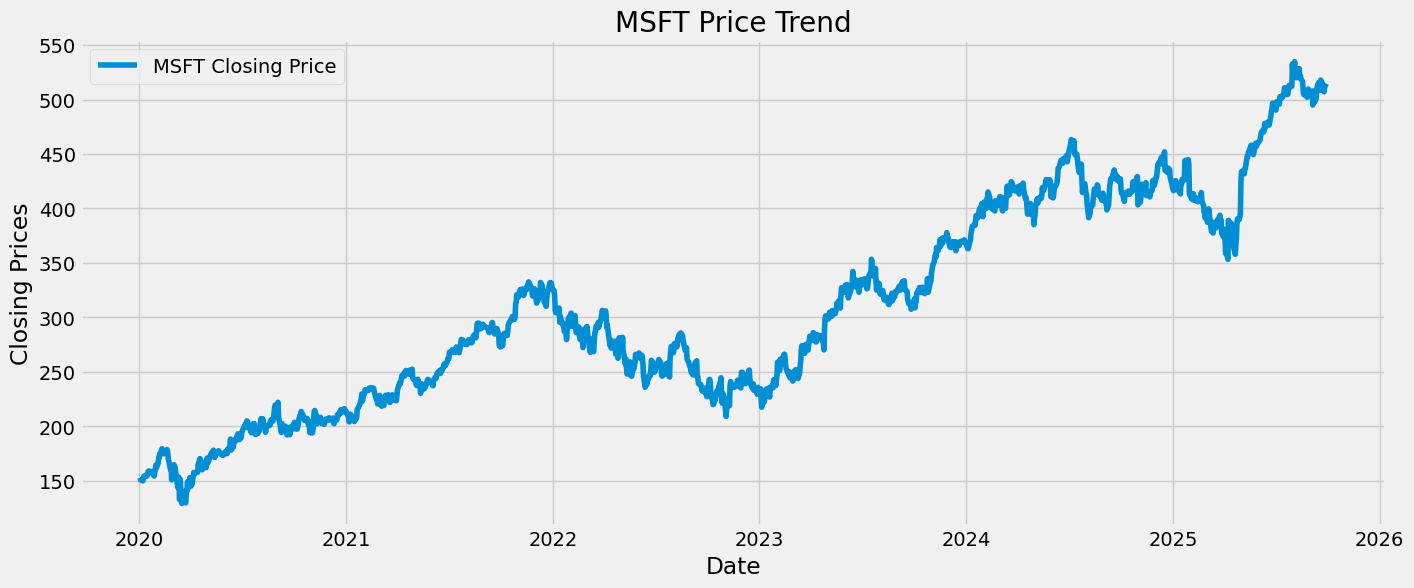

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'],label='MSFT Closing Price')
plt.title('MSFT Price Trend')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()
plt.savefig('msft_price_trend.png', bbox_inches='tight')


In [35]:
target_col= df[['Close']].copy().astype(int) # converting data type to int
target_col.head(5)


Price,Close
Ticker,MSFT
Date,
2020-01-02,152
2020-01-03,150
2020-01-06,151
2020-01-07,149
2020-01-08,152


In [36]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(target_col['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -0.42821165836548136
p-value: 0.9052808130552285


In [37]:
target_col['Close_Diff'] = target_col['Close'].diff()

# Drop NaN created by differencing
diff_series = target_col['Close_Diff'].dropna()

# ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(diff_series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -40.991969930007066
p-value: 0.0


In [38]:
target_col.head()


Price,Close,Close_Diff
Ticker,MSFT,
Date,,
2020-01-02,152,NaN
2020-01-03,150,-2.0
2020-01-06,151,1.0
2020-01-07,149,-2.0
2020-01-08,152,3.0


<Axes: ylabel='Density'>

<Figure size 1500x600 with 0 Axes>

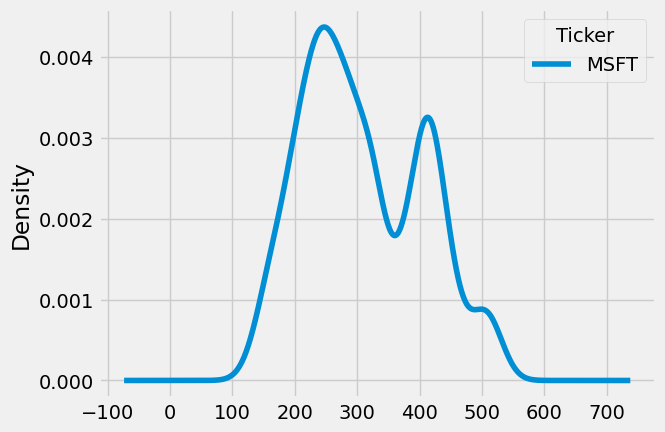

In [39]:
plt.figure(figsize=(15,6))
df['Close'].plot(kind='kde')


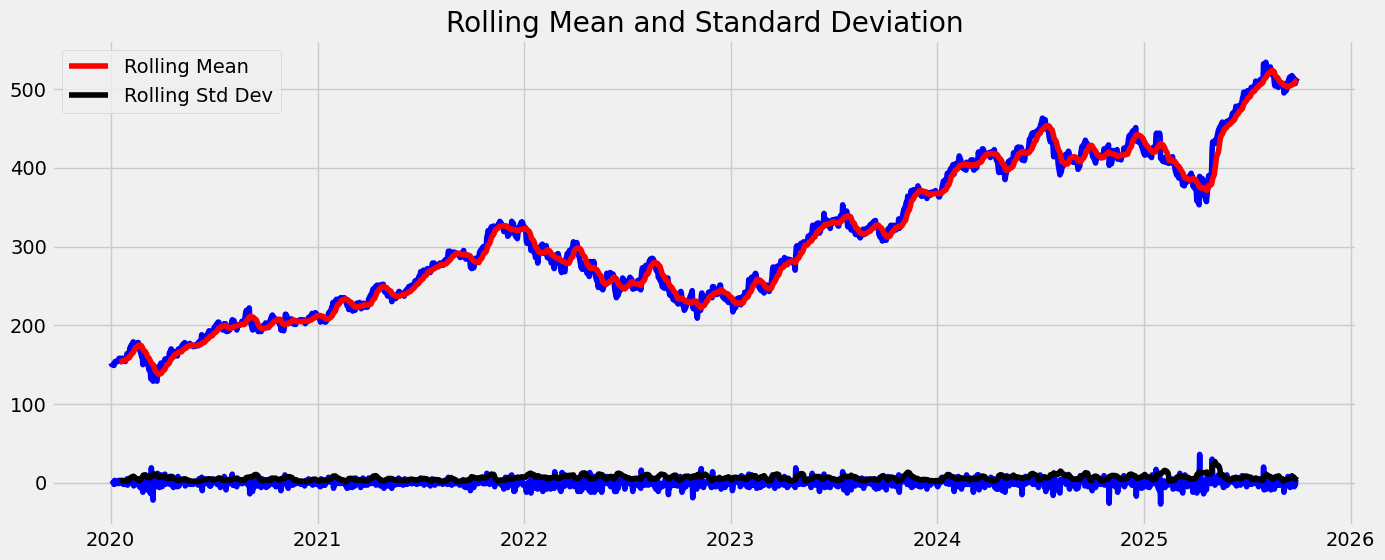

In [40]:
rolmean = target_col['Close'].rolling(12).mean()
rolstd = target_col['Close'].rolling(12).std()

plt.figure(figsize=(15,6))
plt.plot(target_col, color='blue')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std Dev')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()


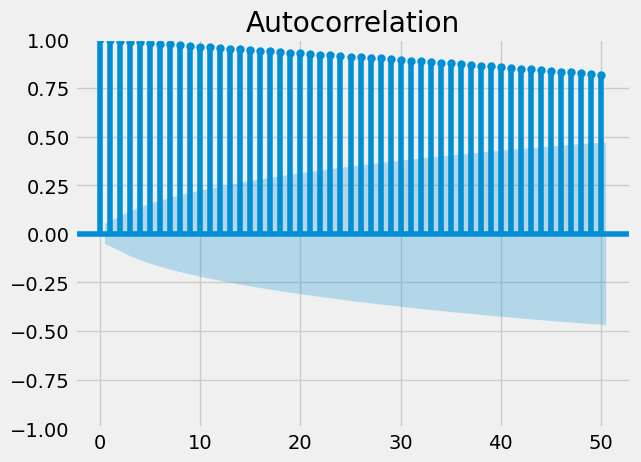

<Figure size 1500x600 with 0 Axes>

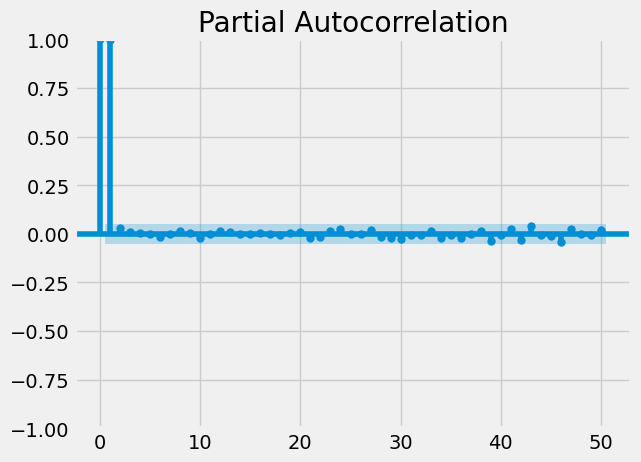

<Figure size 1500x600 with 0 Axes>

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'], lags=50)
plt.figure(figsize=(15,6))
plt.show()

plot_pacf(df['Close'], lags=50)
plt.figure(figsize=(15,6))
plt.show()


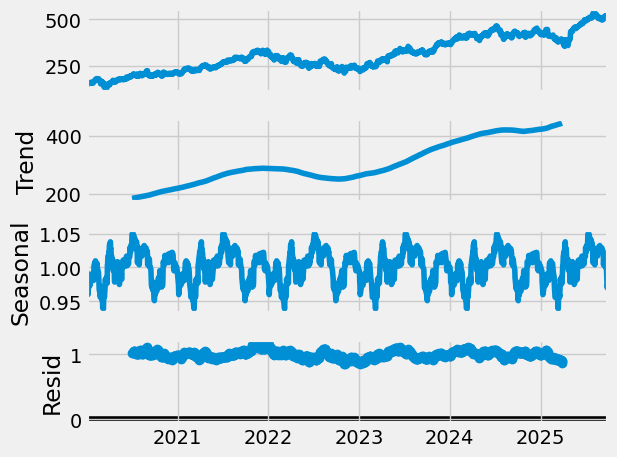

<Figure size 1500x600 with 0 Axes>

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)  # ~252 trading days/year
decomposition.plot()
plt.figure(figsize=(15,6))
plt.show()


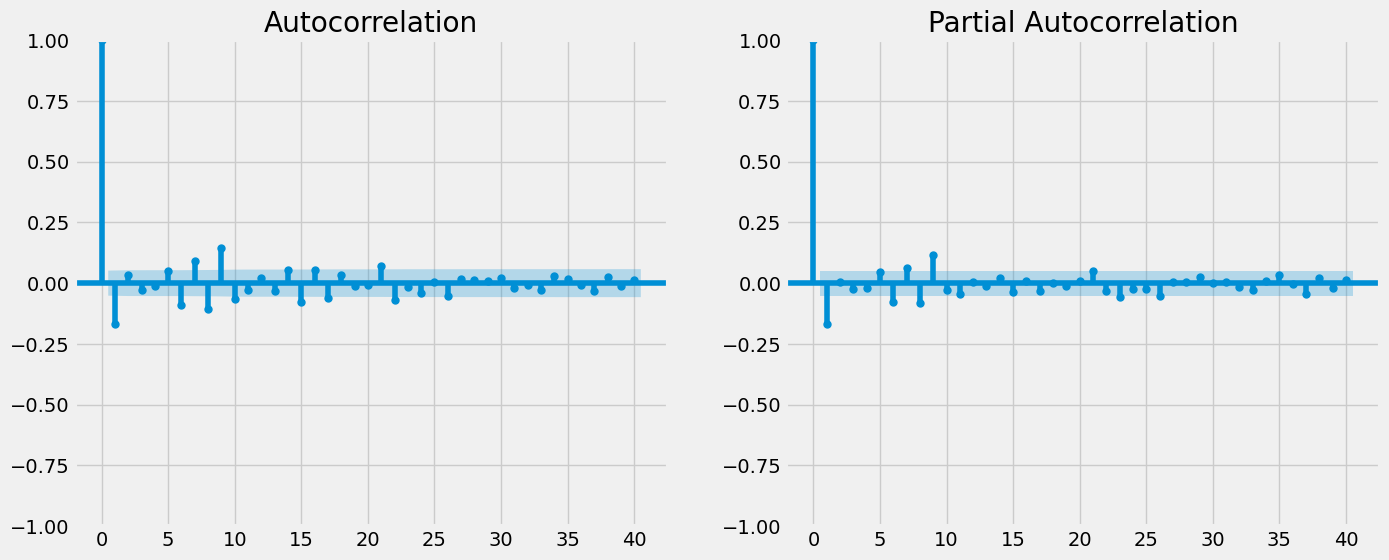

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use log returns as the stationary series
log_ret = np.log(df['Close']).diff().dropna()

# ACF and PACF plots on logs of closing price
fig, ax = plt.subplots(1,2, figsize=(15,6))
plot_acf(log_ret, lags=40, ax=ax[0])
plot_pacf(log_ret, lags=40, ax=ax[1])
plt.show()


In [44]:
from statsmodels.tsa.arima.model import ARIMA

# Build ARIMA model (example with p=3, d=1, q=2)
model = ARIMA(df['Close'], order=(3,1,2))  # direct on price with differencing
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   MSFT   No. Observations:                 1443
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -4389.477
Date:                Sun, 26 Oct 2025   AIC                           8790.953
Time:                        09:40:30   BIC                           8822.596
Sample:                             0   HQIC                          8802.765
                               - 1443                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0509      0.075     -0.676      0.499      -0.199       0.097
ar.L2         -0.9158      0.080    -11.395      0.000      -1.073      -0.758
ar.L3         -0.0928      0.023     -4.081      0.0

In [45]:
train = df['Close'][:-365]
test = df['Close'][-365:]

# Fit ARIMA on training set
model = ARIMA(train, order=(3,1,2))  # adjust order after checking ACF/PACF
model_fit = model.fit()

# Forecast on test set length
forecast = model_fit.forecast(steps=len(test))


In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 49.01386336910064
MAE: 35.05293310578922


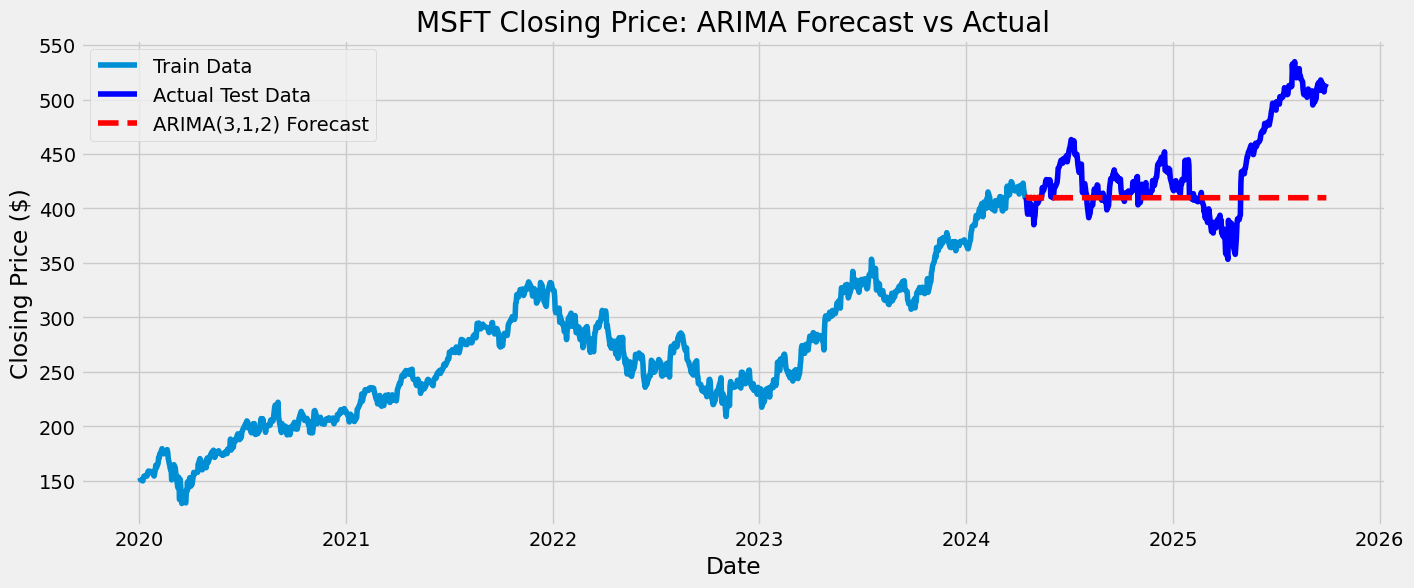

In [47]:
plt.figure(figsize=(15,6))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Actual Test Data', color='blue') # Plot the actual test data
plt.plot(test.index, forecast, label='ARIMA(3,1,2) Forecast', color='red', linestyle='--') # Plot the forecast
plt.legend()
plt.title("MSFT Closing Price: ARIMA Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.grid(True)
plt.show()